In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import *

In [2]:
actual_data = [random.randint(0,1) for i in range(20)]
predicted_data = actual_data[0:8] + [1,0,0,1] + actual_data[12:]
print("Actual data      :",actual_data)
print("Predicted data   :",predicted_data)

Actual data      : [1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]
Predicted data   : [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]


In [3]:
tn,fp,fn,tp = confusion_matrix(actual_data,predicted_data).ravel()
print("TN:   ",tn)
print("FP:   ",fp)
print("FN:   ",fn)
print("TP:   ",tp)

TN:    5
FP:    2
FN:    0
TP:    13


In [4]:
def accuracy(tn,fp,fn,tp):
    return (tp+tn)/(tp+tn+fp+fn)

def precision(tp,fp):
    return tp/(tp+fp)

def recall(tp,fn):
    return tp/(tp+fn)

def f1(tp,fp,fn):
    p = precision(tp,fp)
    r = recall(tp,fn)
    return (2*p*r)/(p+r)

def mcc(tn,fp,fn,tp):
    return ((tp*tn)-(fp*fn))/(((tp+fp)*(fp+tn)*(tn+fn)*(fn+tp))**(1/2))

In [8]:
my_accuracy = accuracy(tn,fp,fn,tp)
sk_accuracy = accuracy_score(actual_data,predicted_data)
print("My accuracy        :",my_accuracy)
print("sklearn accuracy   :",sk_accuracy)

my_precision = precision(tp,fp)
sk_precision = precision_score(actual_data,predicted_data)
print("My precision       :",my_precision)
print("sklearn precision  :",sk_precision)

my_recall = recall(tp,fn)
sk_recall = recall_score(actual_data,predicted_data)
print("My recall          :",my_recall)
print("sklearn recall     :",sk_recall)

my_f1 = f1(tp,fp,fn)
sk_f1 = f1_score(actual_data,predicted_data)
print("My f1 score        :",my_f1)
print("sklearn f1 score   :",sk_f1)

my_mcc = mcc(tn,fp,fn,tp)
sk_mcc = matthews_corrcoef(actual_data,predicted_data)
print("My MCC             :",my_mcc)
print("sklearn MCC        :",sk_mcc)

My accuracy        : 0.9
sklearn accuracy   : 0.9
My precision       : 0.8666666666666667
sklearn precision  : 0.8666666666666667
My recall          : 1.0
sklearn recall     : 1.0
My f1 score        : 0.9285714285714286
sklearn f1 score   : 0.9285714285714286
My MCC             : 0.7867957924694432
sklearn MCC        : 0.7867957924694432


<AxesSubplot:>

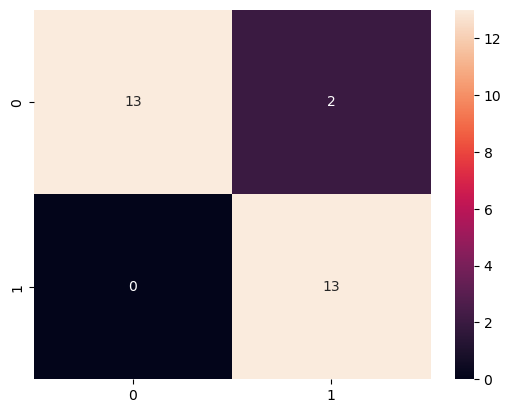

In [9]:
sk_array = [[tp,fp],[fn,tp]]
df=pd.DataFrame(sk_array,range(2),range(2))
sb.heatmap(df,annot=True)

sklearn ROC-AUC score  : 0.8571428571428572


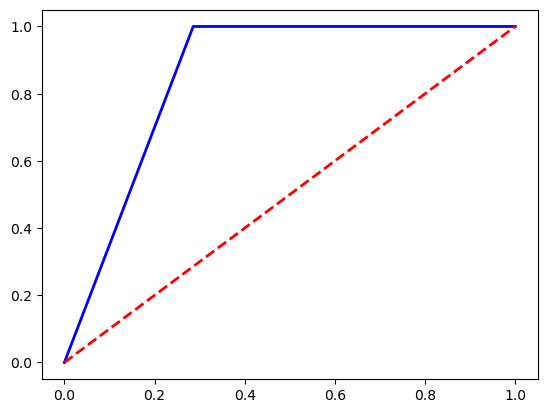

In [10]:
auc = roc_auc_score(actual_data,predicted_data)
print("sklearn ROC-AUC score  :",auc)

fpr,tpr,_ = roc_curve(actual_data,predicted_data)
plt.plot(fpr,tpr,color="blue",lw=2)
plt.plot([0,1],[0,1],color="red",lw=2,linestyle="--")
plt.xlabel=("FPR")
plt.ylabel=("TPR")
plt.title=("ROC Curve")